In [1]:
import Functions as F
import Finding_D as D
import chandrasekhar_mass as chan
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

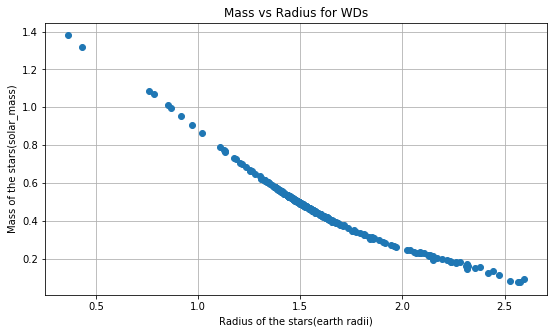

In [6]:
### PART B ###

M,logg = F.data_reader()
fig, axis = plt.subplots(figsize = (9,5))
M,R = F.scaler(M,logg)
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for WDs")
plt.grid(True)
plt.plot(R,M,'o')

scaled parameters are: [ 2.66187192 -3.36637568]
nonscaled first paramter B:   1.3684418608336563e+51
the nearest integer for q is:  3
K is : 3144530.473379261


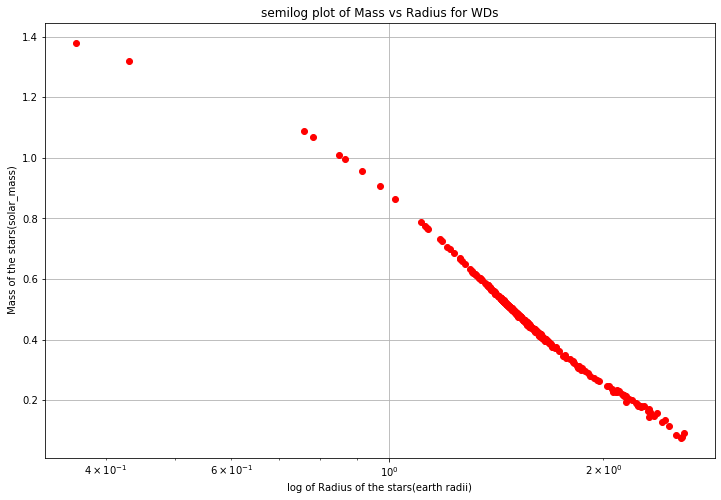

<Figure size 432x288 with 0 Axes>

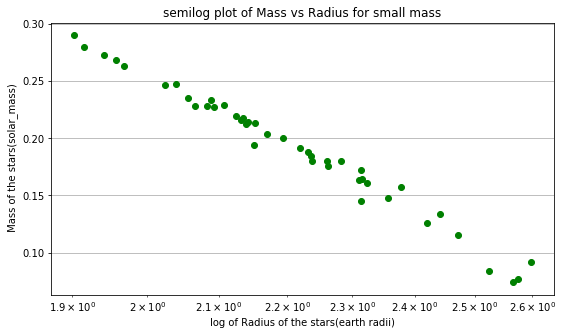

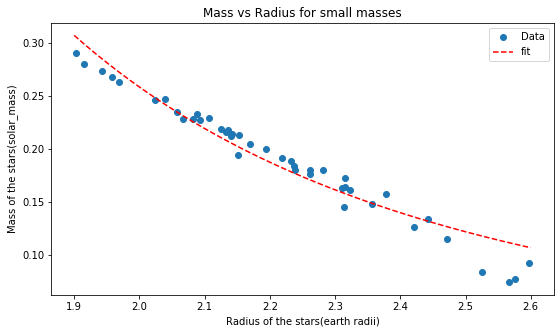

<Figure size 432x288 with 0 Axes>

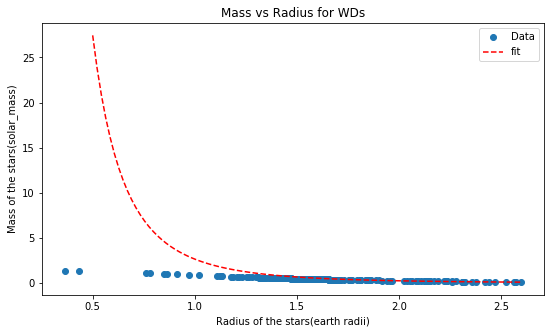

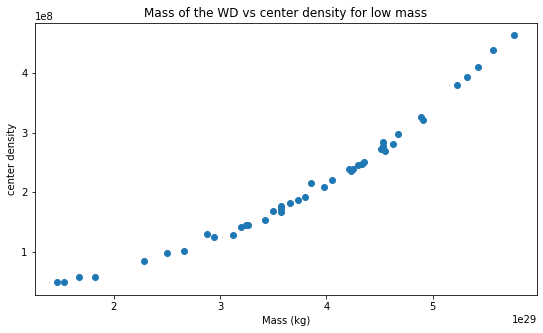

In [12]:
#### PART C ####

fig = plt.subplots(figsize = (12,8))
plt.ylabel(" Mass of the stars(solar_mass)")
plt.xlabel("log of Radius of the stars(earth radii)")
plt.title("semilog plot of Mass vs Radius for WDs")
plt.semilogx(R,M,'ro')
plt.grid(True)
## we conculude that low mass behavior is around m = 0.3
max_mass = 0.29
M_new, R_new = F.low_mass_radius(M,R,max_mass)
plt.figure()
fig, axis = plt.subplots(figsize = (9,5))
plt.grid(True)
plt.ylabel(" Mass of the stars(solar_mass)")
plt.xlabel("log of Radius of the stars(earth radii)")
plt.title("semilog plot of Mass vs Radius for small mass")
plt.semilogx(R_new,M_new,'go')

####FITTING########
x = np.linspace(1.9,2.6,100)
def func(x,a,b):
    return a*(x**b)

solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m
fit,cov = curve_fit(func, R_new, M_new)
fig, axis = plt.subplots(figsize = (9,5))
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for small masses")
plt.plot(R_new,M_new,'o',x,func(x, *fit), '--r')
plt.gca().legend(('Data','fit'), loc='upper right')

plt.figure()
fig, axis = plt.subplots(figsize = (9,5))
z = np.linspace(0.5,2.6,100)
plt.ylabel("Mass of the stars(solar_mass)")
plt.xlabel("Radius of the stars(earth radii)")
plt.title("Mass vs Radius for WDs")
plt.plot(R,M,'o',z,func(z, *fit), '--r')
plt.gca().legend(('Data','fit'), loc='upper right')
print("scaled parameters are:",fit)
B = fit[0]*earth_radius**3*(solar_mass)
print("nonscaled first paramter B:  ", fit[0]*earth_radius**3*(solar_mass))
print("the nearest integer for q is: ", 3)

#### Finding K #####
xi_n = 3.653680580580581 ## found values
theta_prime_n = -0.20308599225966426
n=1.5
G = 6.67408e-11
K = ((B/(4*np.pi*(xi_n**5)*(-theta_prime_n)))**(1/3))*(4*np.pi*G/2.5)
#K = (B/(4*np.pi*xi_n**5*(-theta_prime_n)))**(1/3)*(4/2.5)*np.pi*G
print("K is :",K)

### Finding rho_c ####
solar_mass = 1.988e30 #kg
earth_radius = 6.371e6 #m
M_new = M_new * solar_mass #converting to SI
R_new = R_new * earth_radius
rho_c = (M_new/(R_new**3))*(xi_n/(-theta_prime_n*4*np.pi))
fig, axis = plt.subplots(figsize = (9,5))
plt.plot(M_new,rho_c,'o')
plt.title("Mass of the WD vs center density for low mass")
plt.xlabel("Mass (kg)")
plt.ylabel("center density")

/home/ekrem/Ekrem/chandrasekhar_solver.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [y[1] , (-2/t)*y[1] - (y[0]**2 - (1/y_c**2))**(3/2)]


0 error: 2.743463648961576e-07  and corresponding D:  1710000000.0
1 error: 3.6527118675983414e-07  and corresponding D:  1720000000.0
2 error: 2.938561748742773e-07  and corresponding D:  1730000000.0
3 error: 3.3093604371474526e-07  and corresponding D:  1740000000.0
4 error: 2.468350220498787e-07  and corresponding D:  1750000000.0
5 error: 2.9401099688613414e-07  and corresponding D:  1760000000.0
6 error: 2.2510797418273134e-07  and corresponding D:  1770000000.0
7 error: 1.710877691133372e-07  and corresponding D:  1780000000.0
8 error: 1.1839436197030454e-07  and corresponding D:  1790000000.0
9 error: 7.877768109637209e-08  and corresponding D:  1800000000.0
10 error: 4.1777036536433274e-08  and corresponding D:  1810000000.0
11 error: 1.8467913842483757e-08  and corresponding D:  1820000000.0
12 error: 8.332282964906645e-09  and corresponding D:  1830000000.0
D is : 1830000000.0 with error:  2.1075048042135396e-09 corresponding C is:  5.380892404212922e+21


<Figure size 432x288 with 0 Axes>

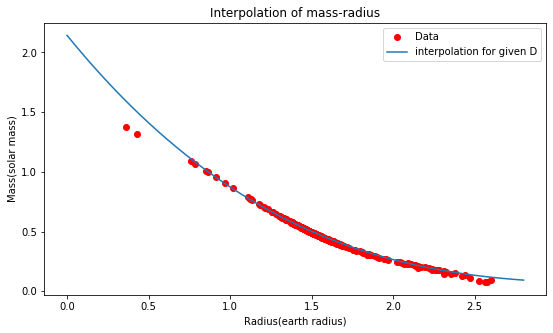

In [9]:
### PART D ###
D.Find_D()

/home/ekrem/Ekrem/chandrasekhar_solver.py:16: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [y[1] , (-2/t)*y[1] - (y[0]**2 - (1/y_c**2))**(3/2)]


given rho_c's :  [100000000.0, 1000000000.0, 10000000000.0, 100000000000.0, 1000000000000.0, 10000000000000.0, 100000000000000.0, 1000000000000000.0, 1e+16, 1e+17, 1e+18, 1e+19, 1e+24, 1e+25, 1e+26, 1e+27]
and corresponding masses:  [0.06909274 0.32918963 0.88427089 1.22537668 1.30425708 1.31539039
 1.31689149 1.31783268 1.31784621 1.31784757 1.31784771 1.31784772
 1.31784772 1.31784772 1.31784772 1.31784772]
difference between two last mass values:  -1.1102230246251565e-15
Chandrasekhar Mass is :  1.3178477203482308 (in solar mass)


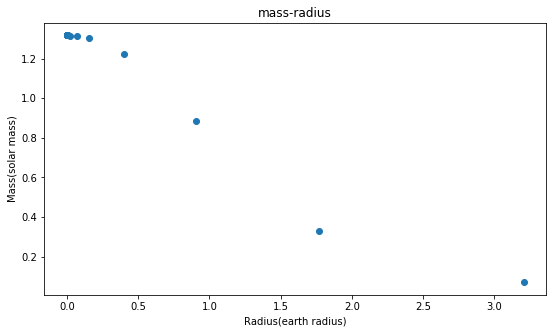

In [11]:
### PART E ###
chan.chandrasekhar_mass()